In [2]:
#Imports
import pandas
import plotnine
from scipy.stats import ttest_ind
import matplotlib
import plotly.express
import numpy

data = pandas.read_csv('./data_mestrado/experimento1.csv')
data_numeric = data[["Distancia XTTS","Similaridade XTTS","Quality (MOSA_NET) XTTS","Inteligibility(MOSA_NET) XTTS","Distancia Your_tts","Similaridade Your_tts","Quality (MOSA_NET) Your_tts","Inteligibility(MOSA_NET) Your_tts"]]
data_numeric_xtts = data[["Distancia XTTS","Similaridade XTTS","Quality (MOSA_NET) XTTS","Inteligibility(MOSA_NET) XTTS"]]
data_numeric_ytts = data[["Distancia Your_tts","Similaridade Your_tts","Quality (MOSA_NET) Your_tts","Inteligibility(MOSA_NET) Your_tts"]]

len(data)

200

In [15]:
data.describe()

,Distancia XTTS,Similaridade XTTS,Quality (MOSA_NET) XTTS,Inteligibility(MOSA_NET) XTTS,Distancia Your_tts,Similaridade Your_tts,Inteligibility(MOSA_NET) Your_tts
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,0.835000,0.984350,4.549800,0.999550,1.485000,0.969400,0.99300
std,1.956249,0.039944,0.089386,0.002307,2.663691,0.056946,0.01203
min,0.000000,0.740000,3.770000,0.980000,0.000000,0.690000,0.91000
25%,0.000000,0.990000,4.520000,1.000000,0.000000,0.960000,0.99000
50%,0.000000,1.000000,4.570000,1.000000,0.000000,1.000000,1.00000
75%,1.000000,1.000000,4.600000,1.000000,2.000000,1.000000,1.00000
max,12.000000,1.000000,4.660000,1.000000,15.000000,1.000000,1.00000


In [5]:
data_numeric_xtts.corr()


,Distancia XTTS,Similaridade XTTS,Quality (MOSA_NET) XTTS,Inteligibility(MOSA_NET) XTTS
Distancia XTTS,1.000000,-0.962467,-0.301648,-0.239185
Similaridade XTTS,-0.962467,1.000000,0.315364,0.266691
Quality (MOSA_NET) XTTS,-0.301648,0.315364,1.000000,0.725614
Inteligibility(MOSA_NET) XTTS,-0.239185,0.266691,0.725614,1.000000


In [4]:
data_numeric_ytts.corr()

,Distancia Your_tts,Similaridade Your_tts,Quality (MOSA_NET) Your_tts,Inteligibility(MOSA_NET) Your_tts
Distancia Your_tts,1.000000,-0.968400,-0.287508,-0.274587
Similaridade Your_tts,-0.968400,1.000000,0.307781,0.290182
Quality (MOSA_NET) Your_tts,-0.287508,0.307781,1.000000,0.884486
Inteligibility(MOSA_NET) Your_tts,-0.274587,0.290182,0.884486,1.000000


In [17]:
#bloxplot entre os modelos
#utilizar as versões normalizadas
#gráfico de dispersão
data_qualidade = data[["Quality (MOSA_NET) XTTS","Quality (MOSA_NET) Your_tts"]]
data_inteligibilidade = data[["Inteligibility(MOSA_NET) XTTS","Inteligibility(MOSA_NET) Your_tts"]]
data_distancia = data[["Distancia XTTS","Distancia Your_tts"]]
data_similaridade = data[["Similaridade XTTS","Similaridade Your_tts"]]


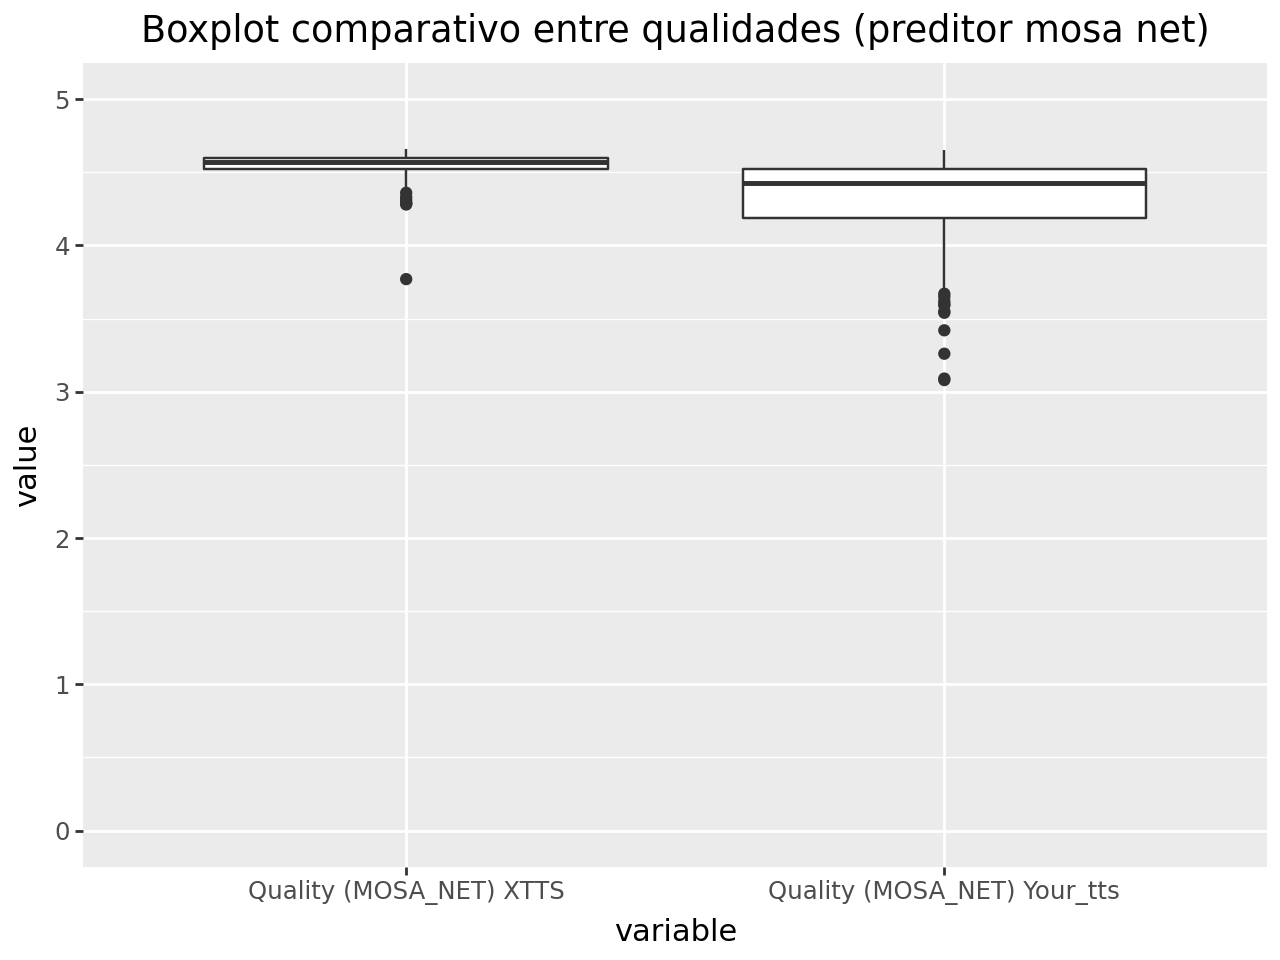

In [46]:
(plotnine.ggplot(pandas.melt(data_qualidade)) + 
     plotnine.aes(x='variable',y='value') + 
     plotnine.geom_boxplot() + 
     plotnine.ggtitle("Boxplot comparativo entre qualidades (preditor mosa net)") +
     plotnine.coord_cartesian(ylim=(0, 5)) 
    )

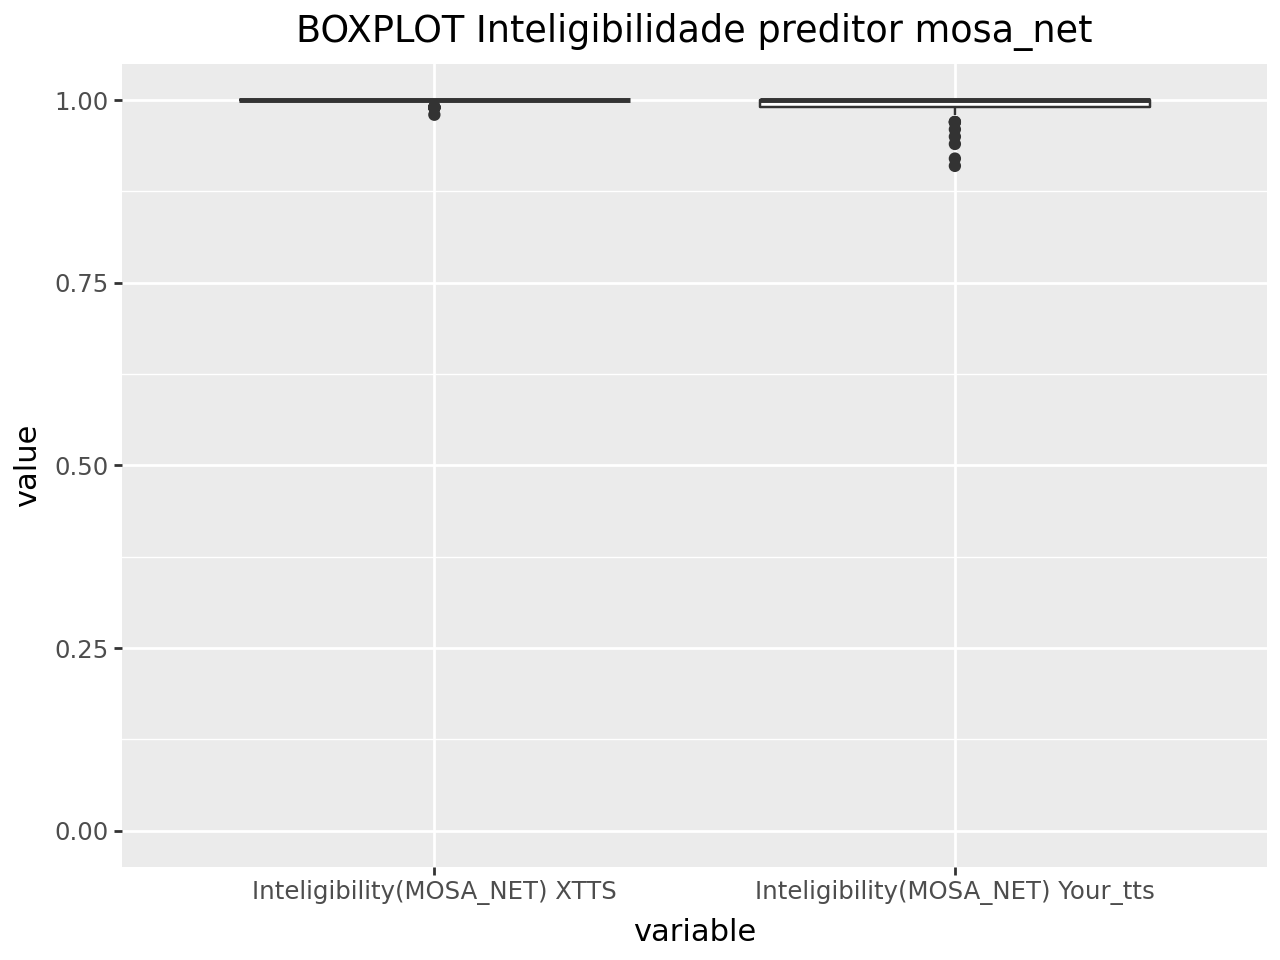

In [44]:
(plotnine.ggplot(pandas.melt(data_inteligibilidade)) + 
     plotnine.aes(x='variable',y='value') + 
     plotnine.geom_boxplot() + 
     plotnine.ggtitle("BOXPLOT Inteligibilidade preditor mosa_net") +
     plotnine.coord_cartesian(ylim=(0, 1)) 
    )

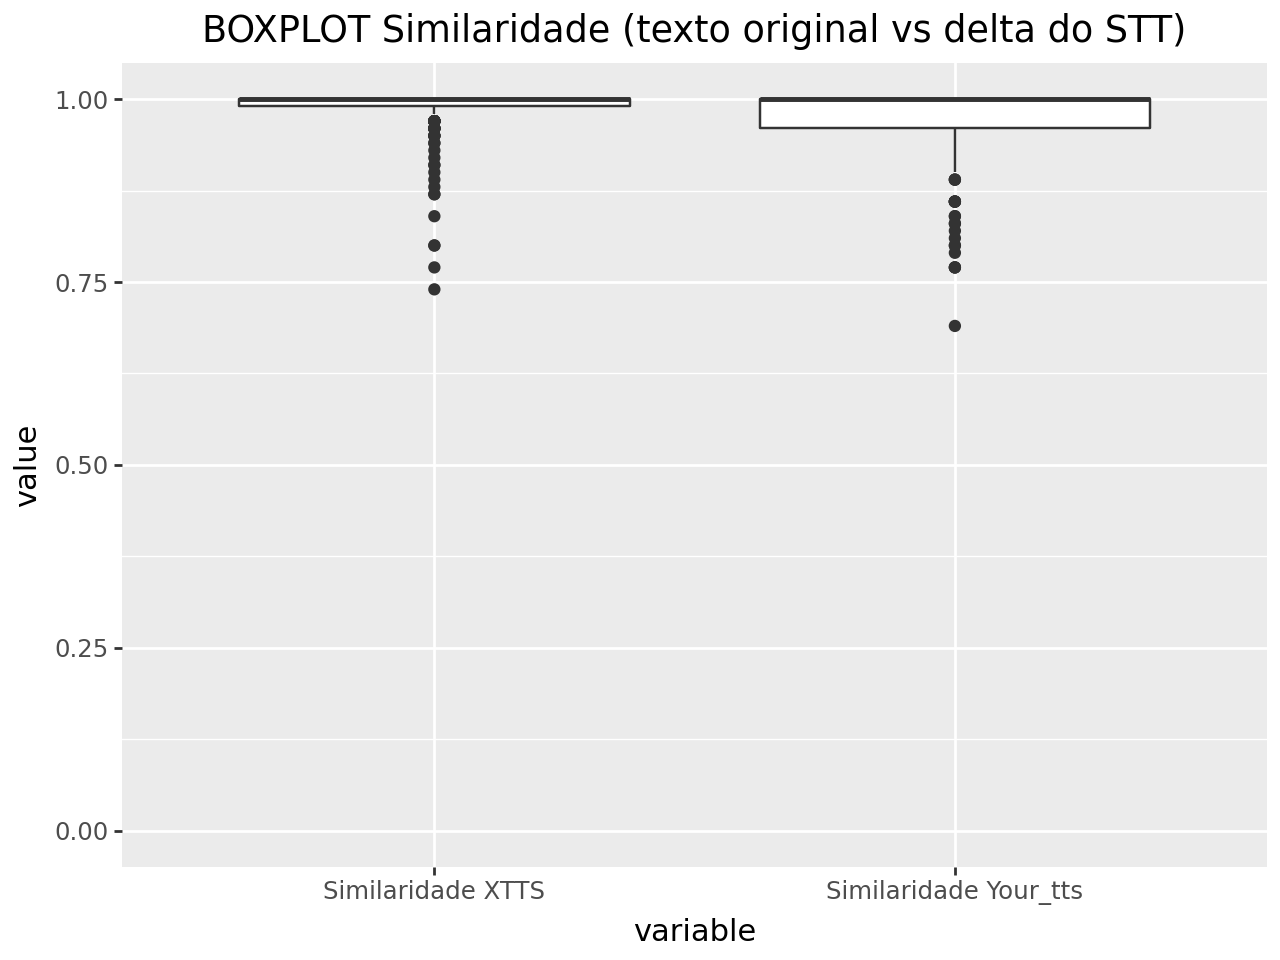

In [41]:
(plotnine.ggplot(pandas.melt(data_similaridade)) + 
     plotnine.aes(x='variable',y='value') + 
     plotnine.geom_boxplot() + 
     plotnine.ggtitle("BOXPLOT Similaridade (texto original vs delta do STT)") +
     plotnine.coord_cartesian(ylim=(0, 1)) 
    )

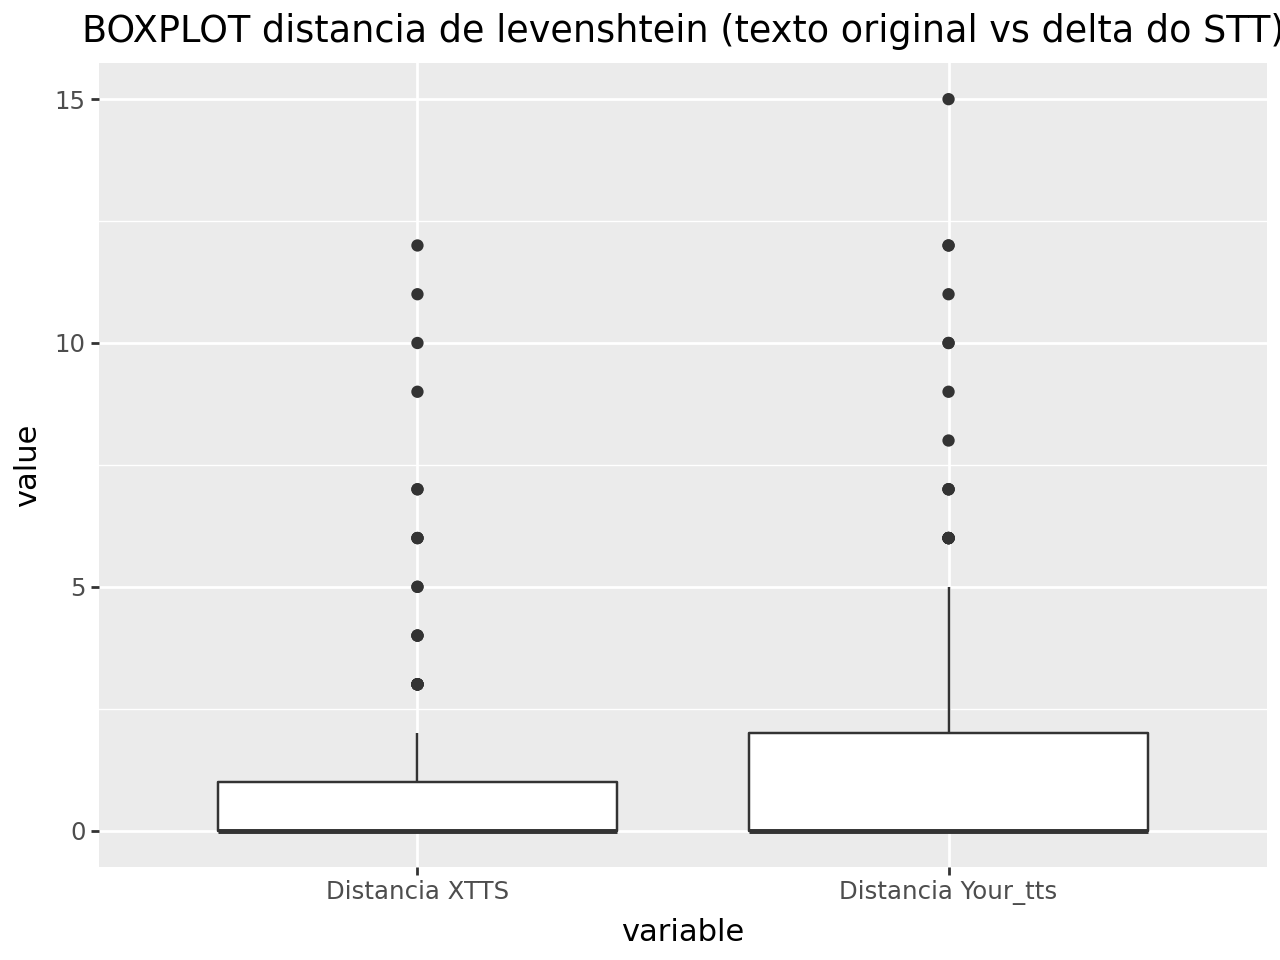

In [42]:
(plotnine.ggplot(pandas.melt(data_distancia)) + 
     plotnine.aes(x='variable',y='value') + 
     plotnine.geom_boxplot() + 
     plotnine.ggtitle("BOXPLOT distancia de levenshtein (texto original vs delta do STT)")
    )

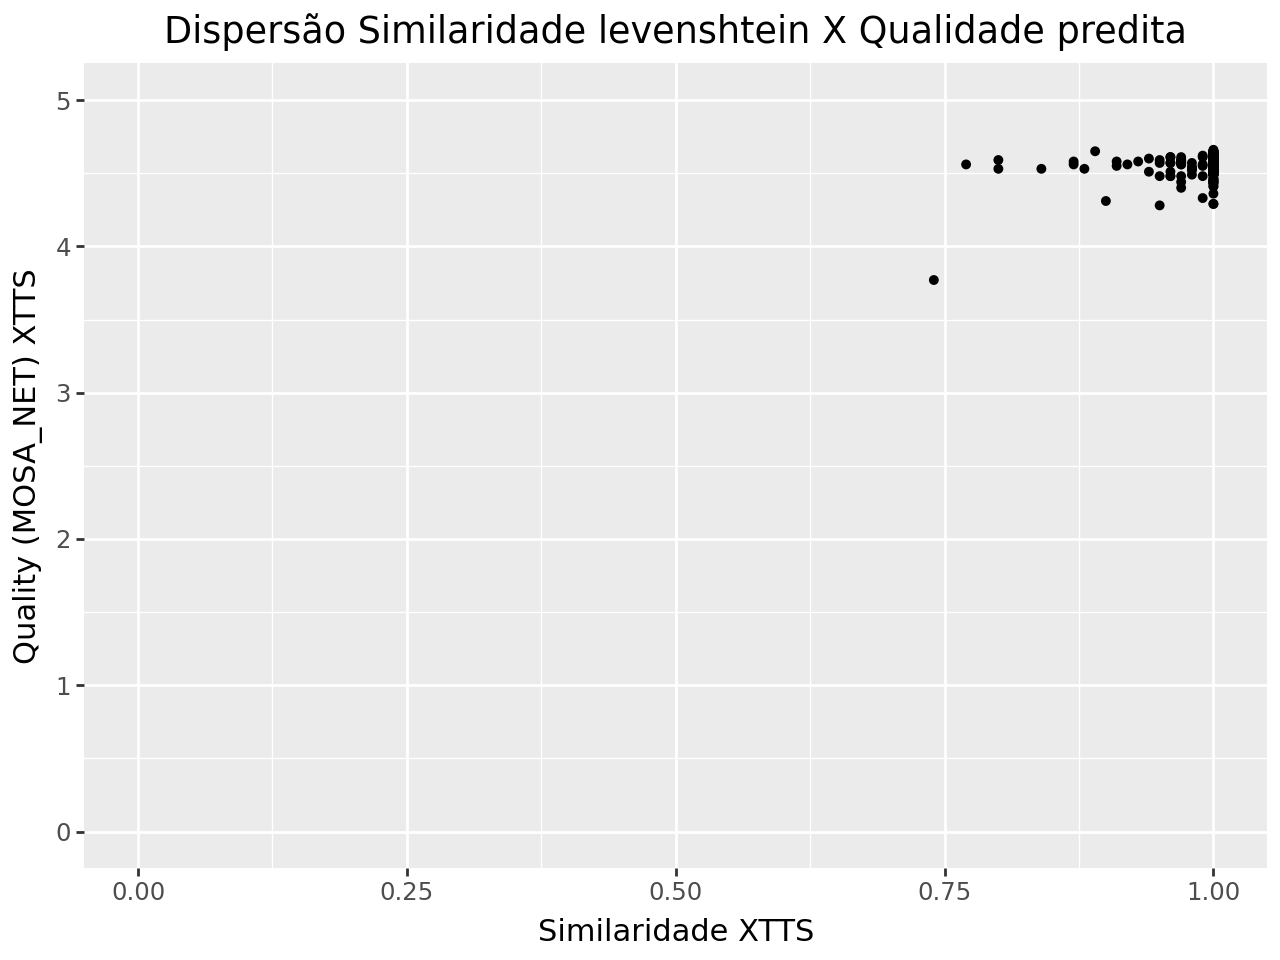

In [34]:
(plotnine.ggplot(data) + 
 plotnine.aes(x='Similaridade XTTS',y='Quality (MOSA_NET) XTTS') + 
 plotnine.geom_point(size = 1) + 
 plotnine.ggtitle("Dispersão Similaridade levenshtein X Qualidade predita") +
 plotnine.coord_cartesian(ylim=(0, 5),xlim=(0,1)) 
)

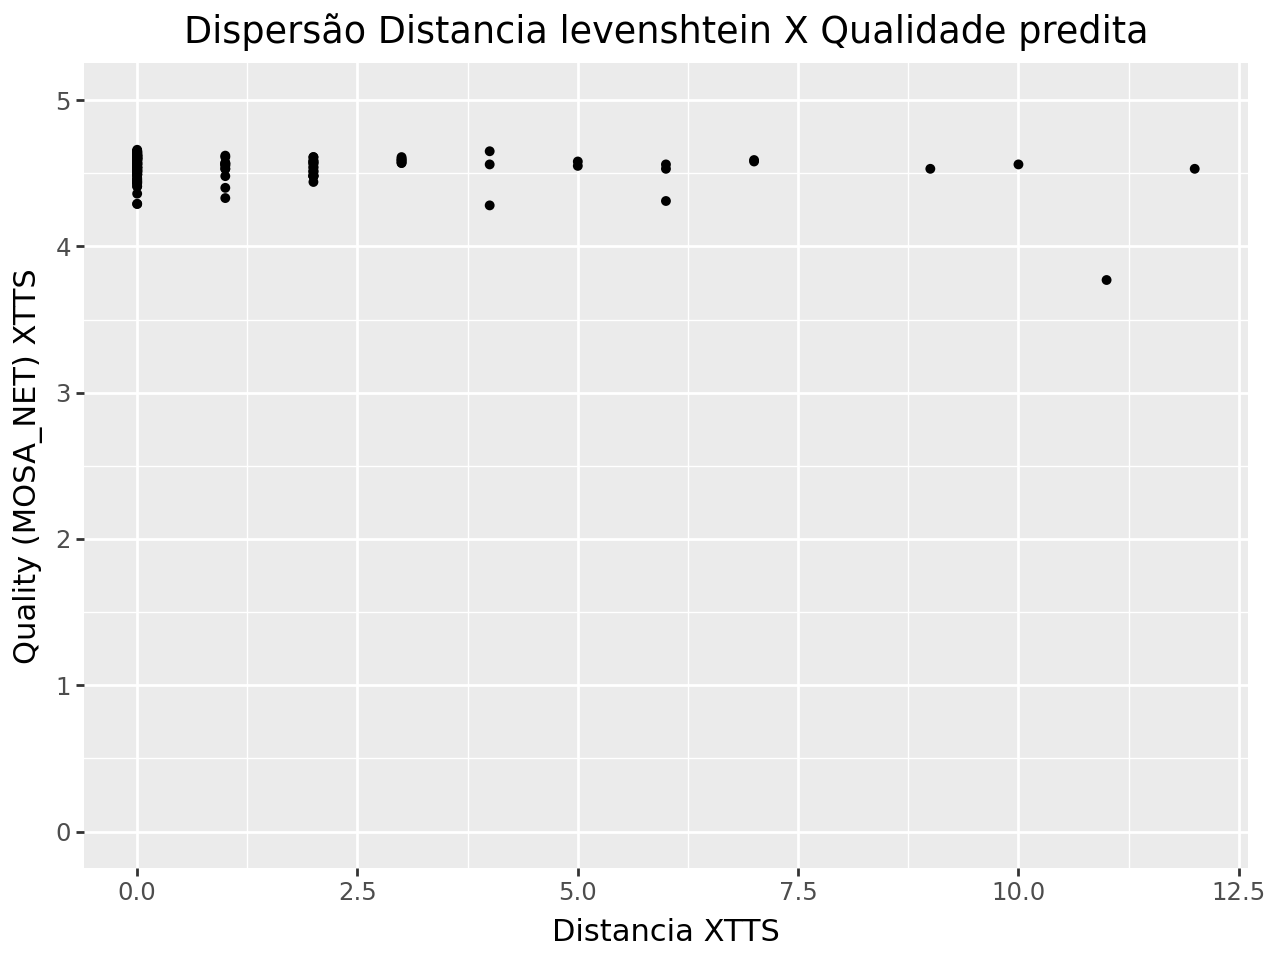

In [38]:
(plotnine.ggplot(data) + 
 plotnine.aes(x='Distancia XTTS',y='Quality (MOSA_NET) XTTS') + 
 plotnine.geom_point(size = 1) + 
 plotnine.ggtitle("Dispersão Distancia levenshtein X Qualidade predita") +
 plotnine.coord_cartesian(ylim=(0, 5)) 
)

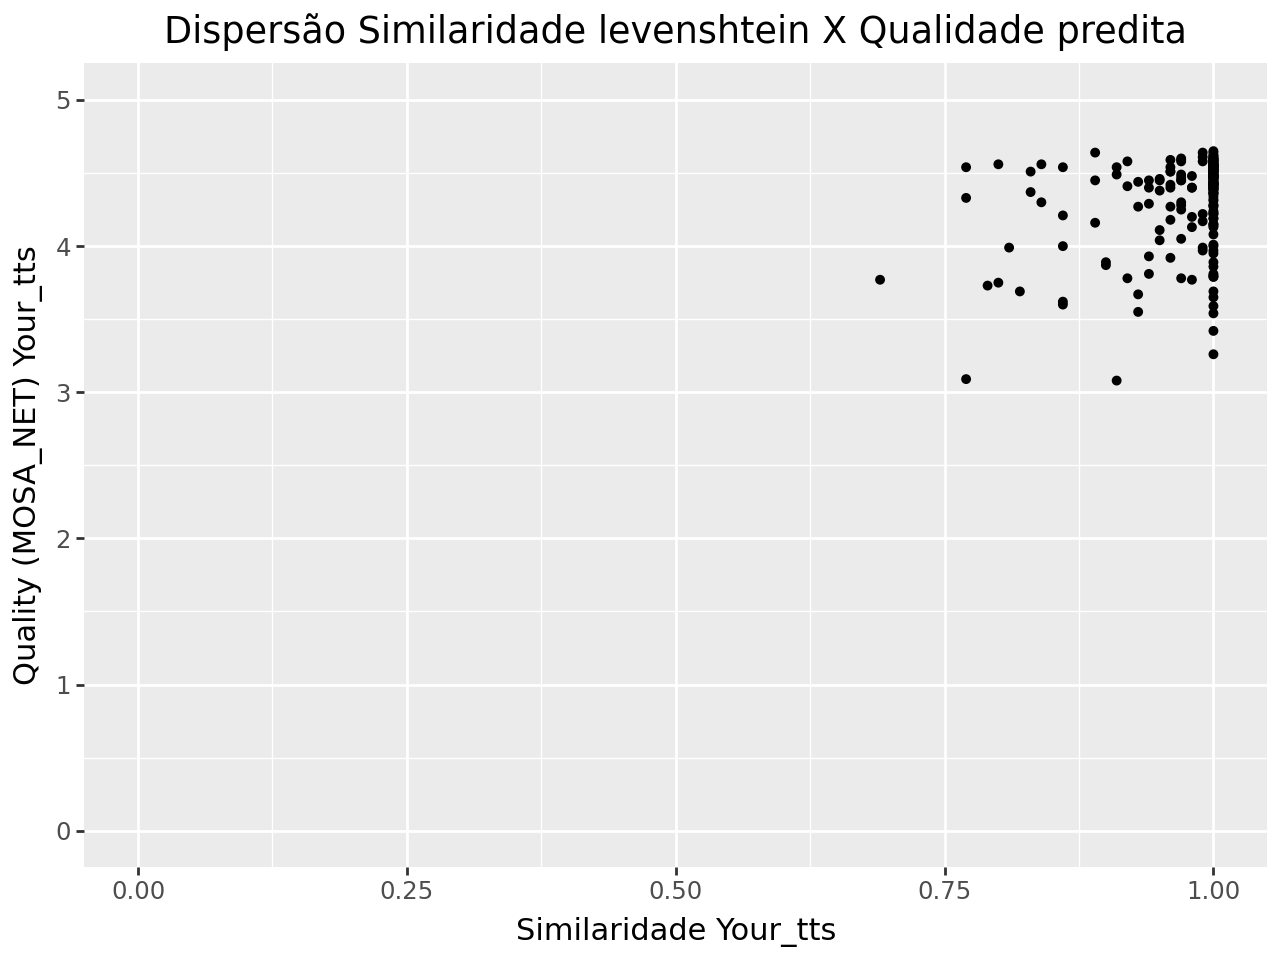

In [35]:
(plotnine.ggplot(data) + 
 plotnine.aes(x='Similaridade Your_tts',y='Quality (MOSA_NET) Your_tts') + 
 plotnine.geom_point(size = 1) + 
 plotnine.ggtitle("Dispersão Similaridade levenshtein X Qualidade predita") +
 plotnine.coord_cartesian(ylim=(0, 5),xlim=(0,1)) 
)

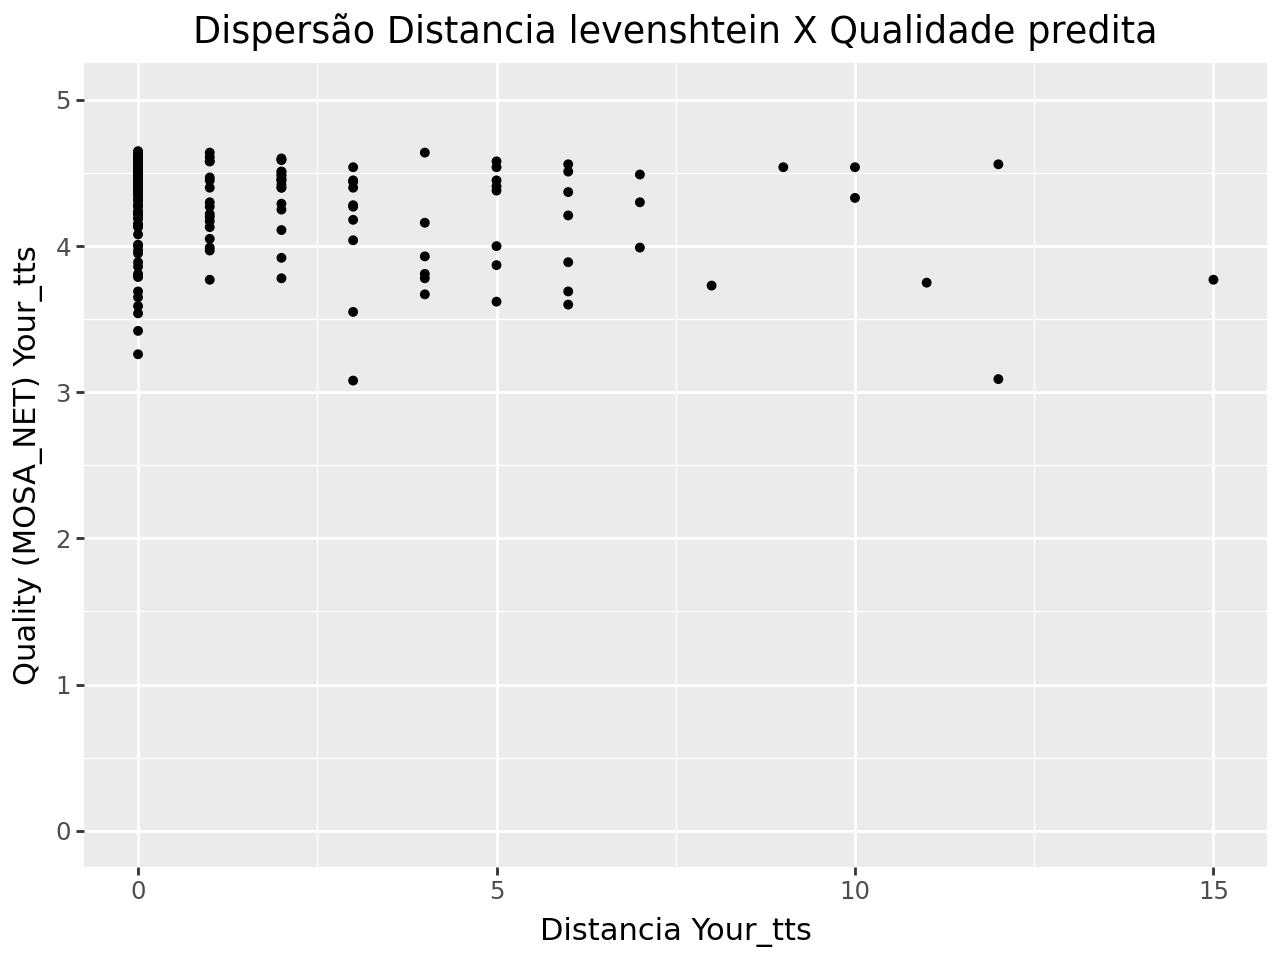

In [40]:
(plotnine.ggplot(data) + 
 plotnine.aes(x='Distancia Your_tts',y='Quality (MOSA_NET) Your_tts') + 
 plotnine.geom_point(size = 1) + 
 plotnine.ggtitle("Dispersão Distancia levenshtein X Qualidade predita") +
 plotnine.coord_cartesian(ylim=(0, 5)) 
)